In [198]:
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [199]:
import pandas as pd

# Load your dataset
auto = pd.read_csv('adverts.csv')
auto.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [200]:
auto = auto.drop(columns=["public_reference", "standard_colour"])

In [201]:
auto["year_of_registration"] = auto["year_of_registration"].mask(auto["year_of_registration"] < 1905)

In [202]:
auto["year_of_registration"].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1957., 1963., 1954.,
       1975., 1955., 1960., 1956., 1959., 1909., 1934., 1958., 1950.,
       1952.])

In [203]:
for col in auto.columns:
    print(f"{col} has {auto[col].isnull().sum()} null values")

mileage has 127 null values
reg_code has 31857 null values
standard_make has 0 null values
standard_model has 0 null values
vehicle_condition has 0 null values
year_of_registration has 33328 null values
price has 0 null values
body_type has 837 null values
crossover_car_and_van has 0 null values
fuel_type has 601 null values


## Ideas

Mileage - Can be estimated based on the age and type of the car

Reg Codes - Can be dropped once the info has been added to year_of_reg

Year of reg - Get some from reg_code, other can be estimated from either: median of all values or imputed from similar cars in the dataset. 

Body type - Impute from data, manual lookup or the highly cursed: "just call chatgpt lmao"

Fuel type - Just assume it is petrol as that is by far the most common. <--- Check that with some analysis (maybe it differs for some brands?)

In [204]:
# Seems unlikely that a 2013 Vauxhall Astra with exactly 999999.0 miles on it

auto["miles_per_day"] = auto["mileage"] / ((2020 -auto["year_of_registration"]) * 365)

auto.loc[(auto["miles_per_day"] > 300) & (auto["miles_per_day"] < np.inf)]

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day
14337,114730.0,69,Land Rover,Discovery,USED,2019.0,52844,SUV,False,Diesel,314.328767
43974,999999.0,63,Vauxhall,Astra,USED,2013.0,9999,Hatchback,False,Diesel,391.389041
115277,740000.0,14,Volvo,XC90,USED,2014.0,14795,SUV,False,Diesel,337.899543
117319,242000.0,19,Honda,Civic,USED,2019.0,15500,Hatchback,False,Diesel,663.013699
131508,788072.0,68,MINI,Countryman,USED,2018.0,22875,SUV,False,Petrol,1079.550685
281160,195668.0,P,Buick,Riviera,USED,2019.0,7500,Saloon,False,Petrol,536.076712


In [206]:
# Seems unlikely that there's a 2012 Fiat 500 kicking about with 0 miles on it being traded in 
# auto["mileage"] = auto["mileage"].replace({0.0: np.nan})

auto.loc[(auto["mileage"] < 10) & (auto["vehicle_condition"] != "NEW") & (auto["year_of_registration"] < 2018)]

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day
1656,0.0,13,Vauxhall,Insignia,USED,2013.0,2975,Hatchback,False,Diesel,0.000000
2754,0.0,63,Audi,A1,USED,2013.0,8000,Hatchback,False,Diesel,0.000000
8677,0.0,D,Porsche,911,USED,1987.0,89995,Convertible,False,Petrol,0.000000
17265,0.0,65,Renault,Kadjar,USED,2015.0,10699,SUV,False,Diesel,0.000000
52682,0.0,61,BMW,X6,USED,2011.0,14000,SUV,False,Diesel,0.000000
67889,0.0,15,Kia,Venga,USED,2015.0,6699,MPV,False,Petrol,0.000000
77011,0.0,W,Porsche,911,USED,1981.0,130000,Coupe,False,Petrol,0.000000
92881,0.0,V,Honda,Civic,USED,1999.0,1496,Hatchback,False,Petrol,0.000000
122534,0.0,C,Land Rover,Defender 110,USED,1986.0,89995,SUV,False,Petrol,0.000000
132740,0.0,66,Volkswagen,up!,USED,2016.0,7995,Hatchback,False,Petrol,0.000000


<Axes: xlabel='mileage', ylabel='Count'>

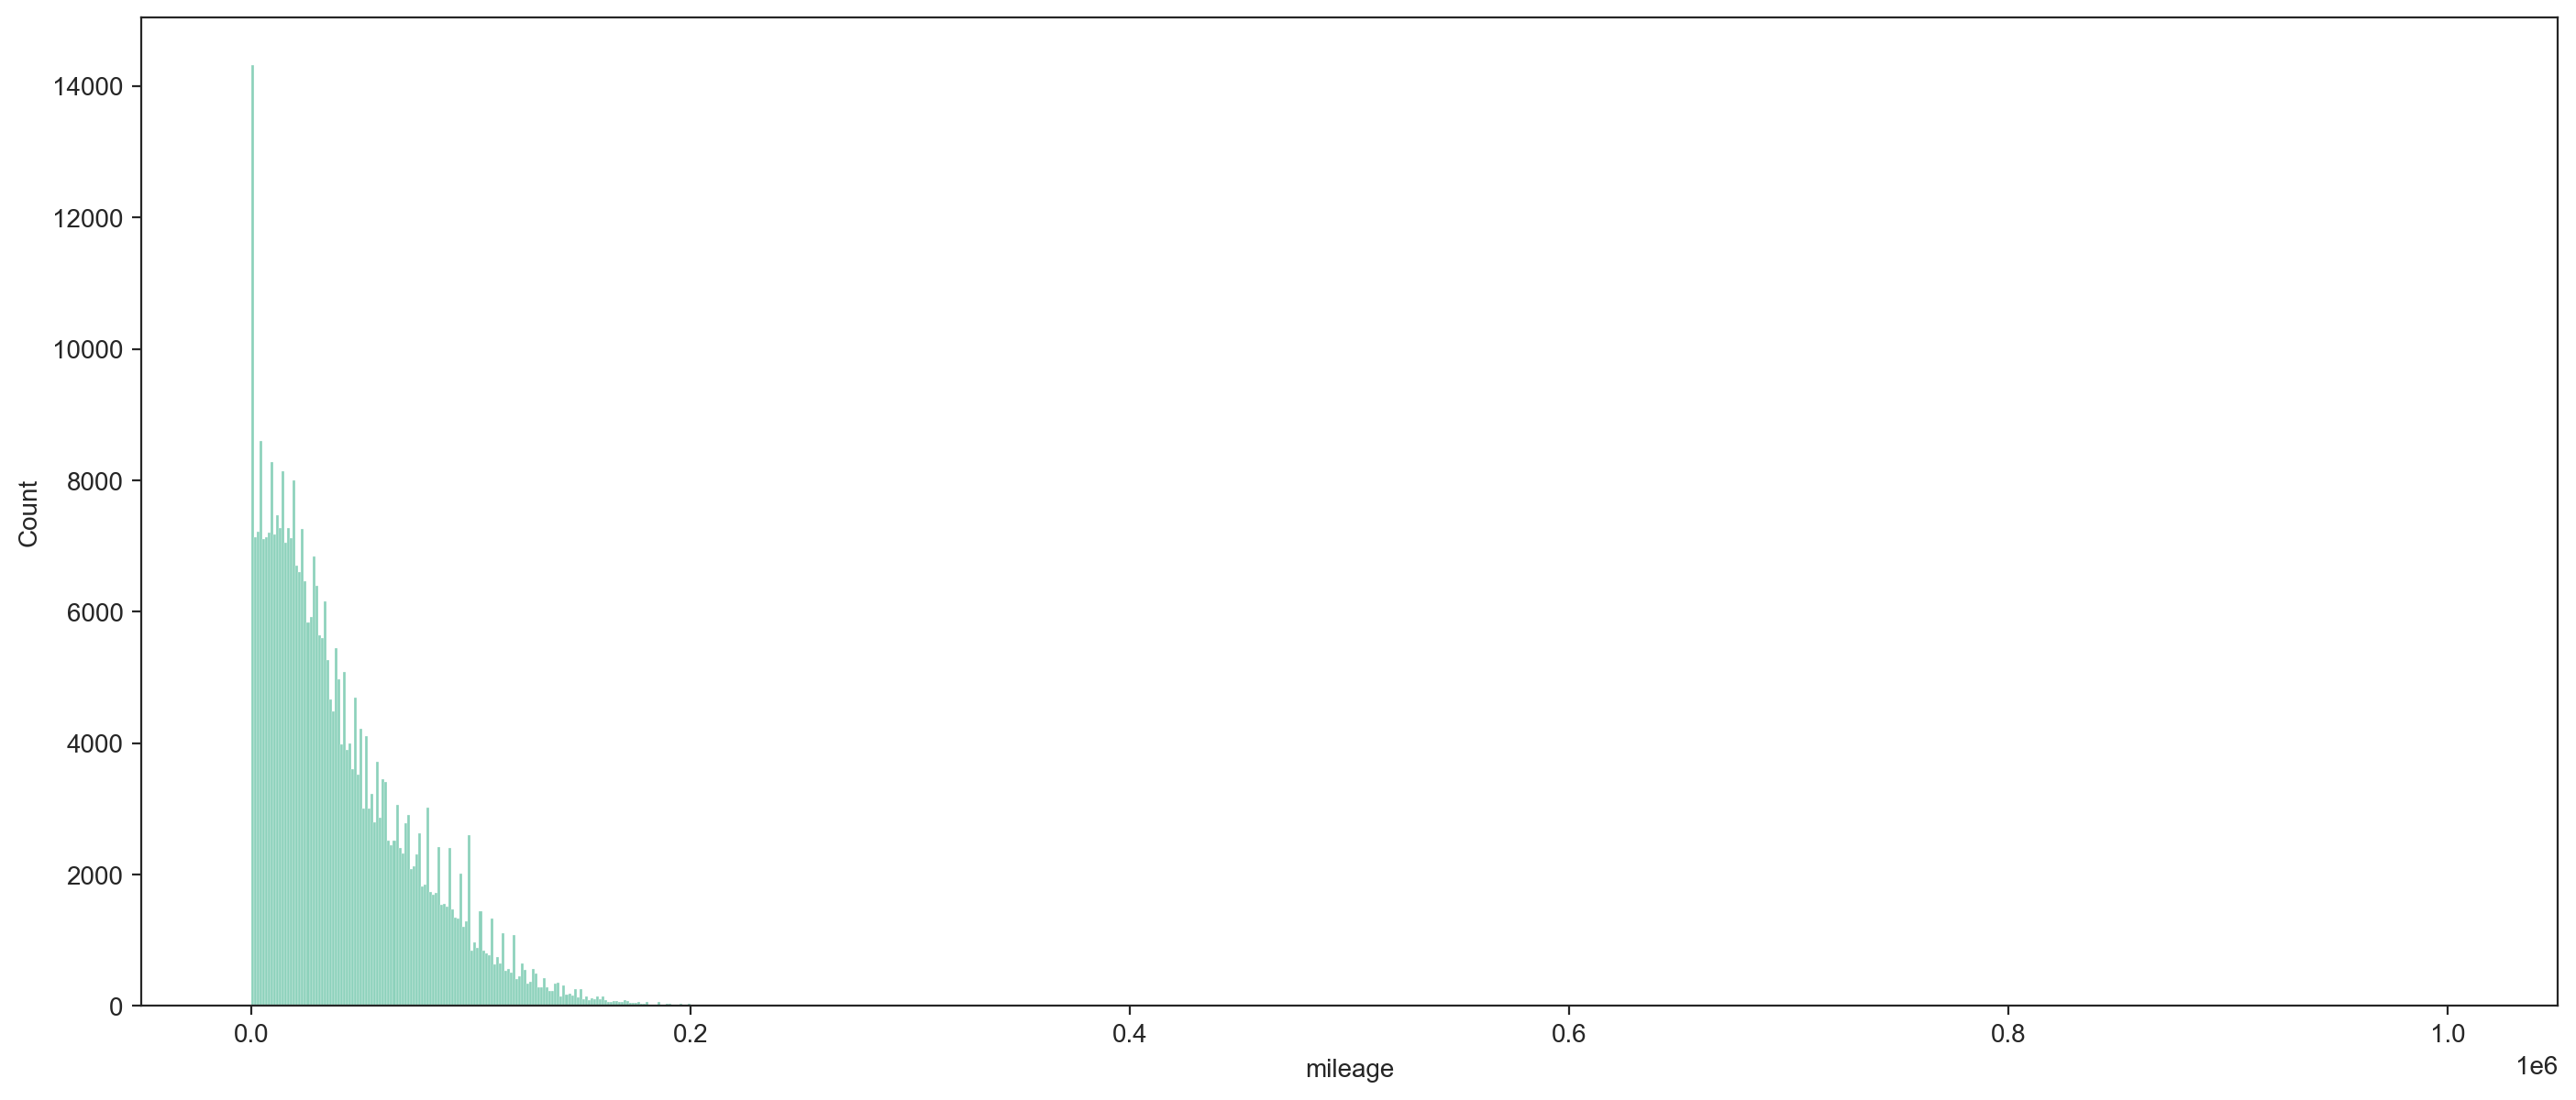

In [193]:
sns.histplot(auto.loc[auto["vehicle_condition"] == "USED"], x="mileage")

In [222]:
# Check that all new cars have the year of reg filled as 
auto.loc[(auto["year_of_registration"] == "NaN") & (auto["vehicle_condition"]=="NEW")]

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day


In [ ]:
# Check that all new cars have the year of reg filled as 
auto.loc[auto["year_of_registration"].isnull() & auto["vehicle_condition"]=="NEW"]

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


In [141]:
auto["reg_code"].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [142]:
auto.loc[auto["year_of_registration"].isnull() & auto["reg_code"].notnull()]

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
54,30000.0,18,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol
83,42847.0,61,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol
865,43130.0,66,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel
968,63369.0,17,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel
1256,18715.0,68,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...
400336,66287.0,63,Vauxhall,Astra GTC,USED,NaN,8400,Coupe,False,Petrol
400725,45.0,20,Land Rover,Range Rover Evoque,USED,NaN,46945,SUV,False,Diesel
401314,12522.0,67,Dacia,Sandero,USED,NaN,6300,Hatchback,False,Petrol
401323,46000.0,13,Volkswagen,Caravelle,USED,NaN,22995,MPV,False,Diesel


In [143]:
def reg_to_year(reg_code):
    if math.isnan(reg_code): return np.nan
    try:
        reg_code = int(reg_code)
    except:
        letters = "ABCDEFGHJKLMNPRSTXYZ"

        if reg_code not in letters: return np.nan
        match reg_code:
            case "V":
                return 1999
            case "W":
                return 2000
        return 1983 + letters.find(reg_code)
    
    if reg_code > 71: return np.nan

    if reg_code < 50:
        if reg_code > 20: return np.nan
        return reg_code + 2000
    
    return reg_code + 1950

auto["reg_code"] = auto["reg_code"].map(reg_to_year)
auto["year_of_registration"].fillna(auto["reg_code"], inplace=True)
auto["year_of_registration"].unique()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/hal/miniforge3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/f8/84hgc_1104zb3d1sn2z03zsc0000gn/T/ipykernel_70834/165448768.py", line 24, in <module>
    auto["reg_code"] = auto["reg_code"].map(reg_to_year)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hal/miniforge3/lib/python3.12/site-packages/pandas/core/series.py", line 4700, in map
    new_values = self._map_values(arg, na_action=na_action)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hal/miniforge3/lib/python3.12/site-packages/pandas/core/base.py", line 921, in _map_values
    return algorithms.map_array(arr, mapper, na_action=na_action, convert=convert)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hal/miniforge3/lib/python3.12/site-packages/pandas/core/algorit

In [ ]:
len(auto.loc[auto["year_of_registration"].isnull()])

31627

In [3]:
auto.loc[auto["price"]>5e6]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
147188,202009103539048,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
336202,202001226429470,950.0,NaN,Black,Ferrari,LaFerrari,USED,NaN,9999999,Coupe,False,Petrol
336536,202006180262926,4400.0,NaN,White,Porsche,959,USED,NaN,9999999,Coupe,False,Petrol


In [ ]:
auto = auto.drop(columns=["standard_colour", "standard_model", "public_reference"])
for col in auto.columns:
    print(auto[col].unique())
auto["price"] = auto["price"].replace(9999999, np.nan)

[     0. 108230.   7800. ... 131980. 102289.  53460.]
[nan '61' '17' '16' '64' '13' '08' '19' '60' '69' '66' '12' '18' '65' '09'
 'B' '10' '14' '03' '67' '63' '15' '68' '56' '20' '70' '62' '11' '05' '59'
 '58' 'W' '02' '57' '06' '52' '53' '04' 'J' '07' '55' '51' 'X' 'D' 'S' 'Y'
 '54' 'H' 'K' 'E' 'L' 'V' 'M' 'G' 'T' 'N' 'P' 'A' 'F' 'R' 'C' '94' '85'
 'CA' 'm' 'FW' '723xuu' '95' 's' '38' 'k' '37' 'p']
['Volvo' 'Jaguar' 'SKODA' 'Vauxhall' 'Land Rover' 'Audi' 'Mercedes-Benz'
 'Volkswagen' 'Peugeot' 'SEAT' 'MINI' 'BMW' 'Nissan' 'Mitsubishi'
 'Ferrari' 'Citroen' 'Toyota' 'Kia' 'Renault' 'Fiat' 'Honda' 'Bentley'
 'DS AUTOMOBILES' 'Hyundai' 'Aston Martin' 'McLaren' 'Smart' 'Alfa Romeo'
 'Porsche' 'Abarth' 'Mazda' 'Suzuki' 'MG' 'Dacia' 'Subaru' 'SsangYong'
 'Maserati' 'Saab' 'Rolls-Royce' 'Lexus' 'Jeep' 'Panther' 'Chevrolet'
 'Lamborghini' 'Daihatsu' 'Dodge' 'Isuzu' 'Lotus' 'Tesla' 'TVR' 'GMC'
 'Rover' 'Cadillac' 'Infiniti' 'Alpine' 'Chrysler' 'Triumph' 'Morgan'
 'Dax' 'London Taxis Internation

In [ ]:
def map_to_int(str_list):
    map_dict = {}
    for i, value in enumerate(str_list):
        map_dict[value] = i
    return map_dict

# Map string values to integers
for column in ["standard_make", "reg_code", "body_type", "fuel_type", "crossover_car_and_van", "vehicle_condition"]:
    mapping_dict = map_to_int(auto[column].unique())                            
    auto[column] = auto[column].replace(to_replace=mapping_dict)


/var/folders/f8/84hgc_1104zb3d1sn2z03zsc0000gn/T/ipykernel_57833/3586677415.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto[column] = auto[column].replace(to_replace=mapping_dict)


In [6]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Assuming auto is your DataFrame
# Selecting only the columns that can be imputed by IterativeImputer (numerical or categorical encoded as numbers)
auto_impute = auto.copy()  # Make a copy to avoid altering original data

# Encoding categorical variables if necessary, to numeric, using one-hot encoding or ordinal encoding
# Here is a simple example using Ordinal encoding, but you may prefer other encodings depending on your data characteristics.
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['standard_make', 'vehicle_condition', 
                       'body_type', 'crossover_car_and_van', 'fuel_type']
encoder = OrdinalEncoder()
auto_impute[categorical_columns] = encoder.fit_transform(auto[categorical_columns].fillna('missing_value'))

# Initialize IterativeImputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the data with missing values
auto_imputed = imputer.fit_transform(auto_impute)

# Convert the imputed array back to a DataFrame with the original column names
auto_imputed = pd.DataFrame(auto_imputed, columns=auto_impute.columns)

# Optionally, convert categorical columns back to their original format
auto_imputed[categorical_columns] = encoder.inverse_transform(auto_imputed[categorical_columns])

# View the resulting DataFrame with imputed values
auto_imputed.head()

,mileage,reg_code,standard_make,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,0.0,0,0,2021.586143,73970.0,0,0,0
1,108230.0,1.0,1,1,2011.000000,7000.0,1,0,1
2,7800.0,2.0,2,1,2017.000000,14000.0,0,0,2
3,45000.0,3.0,3,1,2016.000000,7995.0,2,0,1
4,64000.0,4.0,4,1,2015.000000,26995.0,0,0,1


In [7]:
for col in auto.columns:
    print(f"{col} has {auto_imputed[col].isnull().sum()} null values")

mileage has 0 null values
reg_code has 0 null values
standard_make has 0 null values
vehicle_condition has 0 null values
year_of_registration has 0 null values
price has 0 null values
body_type has 0 null values
crossover_car_and_van has 0 null values
fuel_type has 0 null values


In [8]:
auto_imputed.isnull().values.any()

np.False_

In [ ]:
# Remove low variance features

from sklearn.feature_selection import VarianceThreshold

# Instantiate the VarianceThreshold object with a threshold value
threshold = 0.1  # Adjust threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(auto)

# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

# Subset your data with selected features
selected_data = auto.iloc[:, high_variance_indices]

for col in auto.columns:
    if col not in selected_data.columns:
        print("Dropped", col)

selected_data.head()

Dropped vehicle_condition
Dropped crossover_car_and_van
Dropped fuel_type


,mileage,reg_code,standard_make,year_of_registration,price,body_type
0,0.0,0,0,NaN,73970.0,0
1,108230.0,1,1,2011.0,7000.0,1
2,7800.0,2,2,2017.0,14000.0,0
3,45000.0,3,3,2016.0,7995.0,2
4,64000.0,4,4,2015.0,26995.0,0


### Split data for fitting

In [10]:
from sklearn.model_selection import train_test_split

X, y = auto_imputed.drop(columns="price"), auto_imputed["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression

### MLP Regressor
(My Little Pony Regressor)

In [11]:
# Normalise input features to values 0-1

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler() 
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(180,120,80),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

nn.fit(X_train, y_train)
nn.score(X_train, y_train), nn.score(X_test, y_test)

https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/

In [ ]:
y_pred = nn.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
332044,23000.0,24860.839990
173955,16000.0,15915.264299
367464,4799.0,4974.336713
47695,11000.0,13003.325501
210184,5400.0,6440.238958


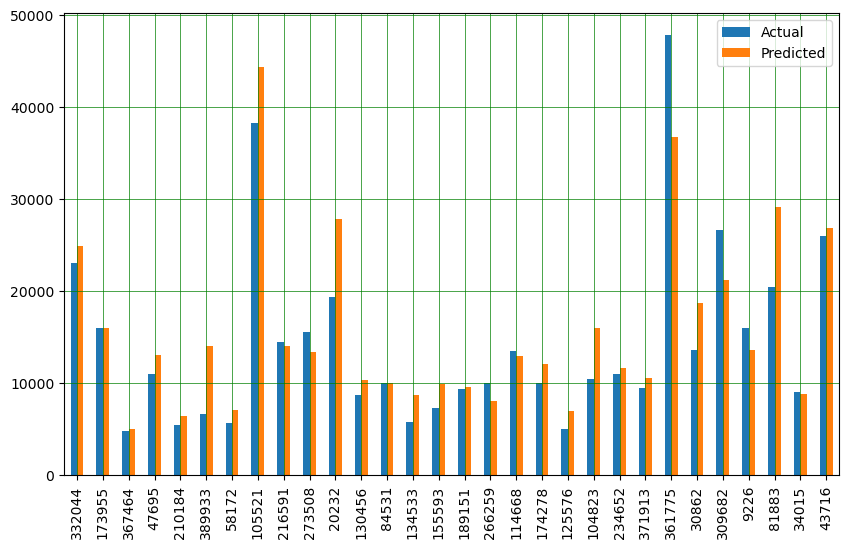

In [ ]:
import matplotlib.pyplot as plt

df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4177.2676974313845
Mean Squared Error: 297218113.5196707
Root Mean Squared Error: 17240.01489325548


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(nn, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

KeyboardInterrupt: 

Best Params: 
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}

In [ ]:
grid_predictions = grid.predict(X_test) 

In [ ]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
332044,23000.0,20129.801384
173955,16000.0,16715.639034
367464,4799.0,3135.050260
47695,11000.0,12277.705602
210184,5400.0,7190.864910


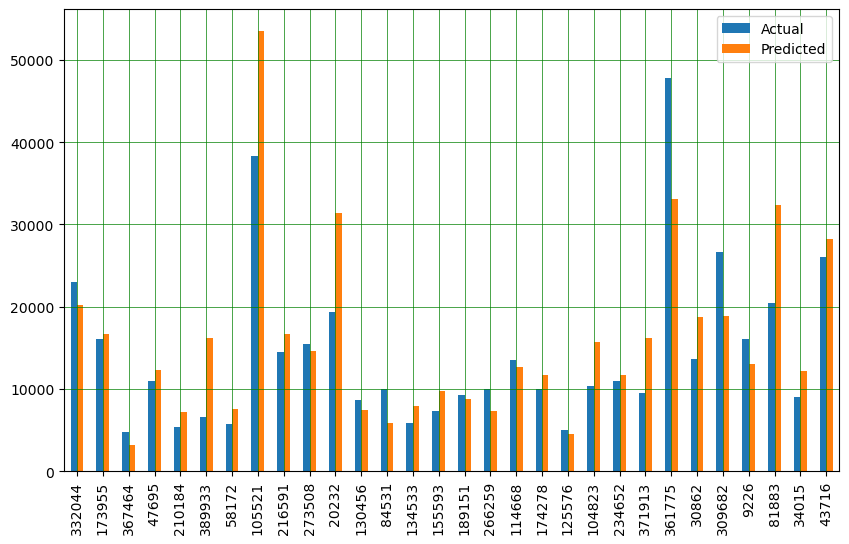

In [ ]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error: 5177.329648334305
Mean Squared Error: 383942269.40369207
Root Mean Squared Error: 19594.444860819407
